# Reviews Analyzer

The objective of this analysis is threefold:
1. Word association identification
2. Contextual sentiment extraction
3. Theme/topic assignment to word clusters

The dataset used for the purpose of this analysis consists of [hotel reviews](https://code.google.com/archive/p/dataset/downloads) mined from [Tripadvisor.com](http://tripadvisor.com)

### Lets load the data
Hotel reviews are available for the cities of Beijing, Chicago, Dubai, Las-Vegas, London, Montreal, New-Delhi, New-York-City, San-Francisco and Shanghai spanning the years 2003 - 2010. For the purpose of this analysis, the city has been set to *chicago* and year to *2007*. These settings however **can** be changed. 

In [11]:
# Load necessary libraries
import numpy as np
import nltk



# Read Hotel Reviews Data into a data frame
dataPath = 'OpinRankDataSet/hotels/'
city = 'chicago'
year = '2007'
hotelReviewCount, reviewsDF = hf.readReviewsData(dataPath, city, year)
print('Done reading data')

Done reading data


In [35]:
# Load custom module
import helperFunctions as hf

### Clean up the text
Cleaning mainly involves removal of noisy characters, stopwords, case normalization and stemming. A mapping is also created between words and their stemmed forms, so that extracting the actual word is possible.

In [12]:
# Create combined reviews corpus from all reviews for different applications
combinedCorpus = reviewsDF['FullReview'].str.cat(sep=' ')
corpusOnlyChar = hf.preprocessText(combinedCorpus,onlyChar=True,lower=True,stopw=False,stem=False)
corpusNoStop   = hf.preprocessText(corpusOnlyChar,onlyChar=False,lower=False,stopw=True,stem=False)
corpusStem     = hf.preprocessText(corpusNoStop,onlyChar=False,lower=False,stopw=False,stem=True)
print('Done corpus processing')

# Create the unstem dictionary for the corpus
unstemDict = {}
corpusTrim = np.array(corpusNoStop.split())
hf.unstem(corpusTrim,unstemDict)
corpusTrim = list(corpusTrim)
print('Done creating unstem dictionary')

Done corpus processing
Done creating unstem dictionary


### A quick look at the most frequent terms in the corpus

Here is a list of the top-most occurring words in the corpus:


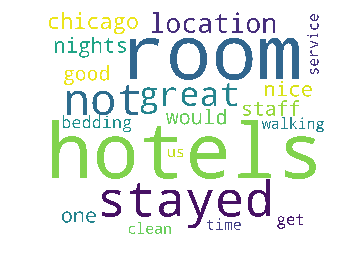

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Extract the most frequent words (excluding stopwords)
cleanReview = reviewsDF['FullReview'].apply(hf.preprocessText)
mostFreqWords = hf.getMostFrequentWords(cleanReview,unstemDict,5)

print('Here is a list of the top-most occurring words in the corpus:')
freqWordsDict = mostFreqWords[:20].to_dict()['Count']
freqCloud = WordCloud(background_color='white',
                      width=1000,
                      height=800,
                      scale = 5,
                      random_state=10,
                      min_font_size=6).generate_from_frequencies(freqWordsDict)
plt.imshow(freqCloud)
plt.axis('off')
plt.show()

### Word Association

Although word association has many connotations, it can be broadly classified into two types:
1. **Paradigmatic Association**: These words are associated because they appear in a similar context. Paradigmatically associated words can be used interchangeably in a sentence without affecting its semantics. Eg: "I bumped into my friend while on my way to work". Here *work* can be replaced with *college* without affecting the semantic correctness of the sentence.
2. **Syntagmatic Association**: These words are associated because they are typically collocated. Syntagmatically associated words often occur together in a sentence. Eg: "The person at the front desk assited me". The words *front desk* are collocated and often occur together.

Both these associations have been mined for in the reviews.

#### Paradigmatic Association
Here is an example for paradigmatically associated words in the corpus. The example word 'suite' can be replaced with another word to finds its associations in the corpus

In [36]:
# Find Similar Words (appearing in similar contexts)
from nltk import ContextIndex
corpusOnlyChar = hf.preprocessText(combinedCorpus,onlyChar=True,lower=True,stopw=False,stem=False)
reviewContextFull3W = ContextIndex(tokens=corpusOnlyChar.split(),context_func=hf.contextFunc3W)
reviewContextFull2W = ContextIndex(tokens=corpusOnlyChar.split(),context_func=hf.contextFunc2W)
reviewContextStop2W = ContextIndex(tokens=corpusNoStop.split(),context_func=hf.contextFunc2W)

word = 'suite'
similarWords = hf.getSimilarWords(word, reviewContextFull3W, reviewContextFull2W, reviewContextStop2W, numWords=20)

similarWords = similarWords.to_dict()
similarWordsDict = [similarWords[di] for di in similarWords]
print('Here is a list of words associated with '+ word)
freqCloud = WordCloud(background_color='white',
                      width=1000,
                      height=800,
                      scale = 5,
                      random_state=10,
                      min_font_size=6).generate_from_frequencies(similarWordsDict)
plt.imshow(freqCloud)
plt.axis('off')
plt.show()

Here is a list of words associated with suite


AttributeError: 'list' object has no attribute 'items'

In [33]:
similarWords

{'Score': {0: 0.11732661122981355,
  1: 0.053400482850884792,
  2: 0.02541308516389449,
  3: 0.016084902253950175,
  4: 0.04392988439656121,
  5: 0.055867352982583274,
  6: 0.044213303005571289,
  7: 0.052851377628767723,
  8: 0.022383435925520574,
  9: 0.065060714865793179,
  10: 0.056481279938435845,
  11: 0.077435728427836706,
  12: 0.035416340908855551,
  13: 0.063947701081152858,
  14: 0.032123727964985388,
  15: 0.04051071112825743,
  16: 0.08584211230726782,
  17: 0.041957522239980914,
  18: 0.03508393497882363,
  19: 0.034669790721063479},
 'Word': {0: 'room',
  1: 'staff',
  2: 'bed',
  3: 'hotel',
  4: 'food',
  5: 'bathroom',
  6: 'stay',
  7: 'concierge',
  8: 'service',
  9: 'lounge',
  10: 'center',
  11: 'bellman',
  12: 'view',
  13: 'help',
  14: 'lobby',
  15: 'door',
  16: 'waiter',
  17: 'shower',
  18: 'price',
  19: 'city'}}

In [ ]:








# Find Collocated Words (words appearing together in a phrase)
from nltk.collocations import BigramCollocationFinder
windowSize = 3
finder = BigramCollocationFinder.from_words(corpusStem.split(), windowSize)
collocationWords = hf.getCollocatedWords(finder,unstemDict,numPairs=10)
print('Done Finding Collocated words')

# Find Contextual Sentiments
reviewsDF['cleanReview'] = reviewsDF['FullReview'].apply(hf.preprocessText)
mostFreqWords = hf.getMostFrequentWords(reviewsDF['cleanReview'],unstemDict,5)
posTaggedWords = nltk.pos_tag(list(mostFreqWords.index))
hotelWords = [w for w,tag in posTaggedWords if tag == 'NN']
reviewSentiments = hf.getContextualSentiment(reviewsDF['FullReview'][1], domainWords = hotelWords)
print('Done building sentiment analyzer')

# Get similar word clusters along with topic
cleanReview = reviewsDF['FullReview'].apply(hf.preprocessText,stopw=True,minLen = False)
cleanReview = cleanReview.str.cat(sep=' ')
maxClusters = 10
clusterDict = hf.getThemeClusters(cleanReview,mostFreqWords,unstemDict,maxClusters)
print('Done clustering similar terms and assigning topic')